**Importing required liabraries**

In [ ]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
%matplotlib inline

In [12]:
train_data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
train_original=train_data.copy()

In [13]:
train_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [14]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')
test_original=test_data.copy()

In [15]:
test_data

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


**Data Pre-Processing**

Data Integration : Combine the train.csv and test.csv files.

In [18]:
combine_data = train_data.append(test_data,ignore_index=True,sort=True)
combine_data.head(10)

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...


In [19]:
combine_data.tail(10)

,id,label,tweet
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfutu...
49150,49151,NaN,"black professor demonizes, proposes nazi style..."
49151,49152,NaN,learn how to think positive. #positive #ins...
49152,49153,NaN,"we love the pretty, happy and fresh you! #teen..."
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


Removing Twitter Handles(@User)

In [20]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [23]:
combine_data['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine_data['tweet'], "@[\w]*")
combine_data.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Removing Punctuation, Numbers, and Special Characters

In [24]:
combine_data['Tidy_Tweets'] = combine_data['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")
combine_data.head(10)

<ipython-input-24-df66d842ca43>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine_data['Tidy_Tweets'] = combine_data['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


Removing Short Words

In [25]:
combine_data['Tidy_Tweets'] = combine_data['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine_data.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


Tokenization

In [26]:
tokenized_tweet = combine_data['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

Stemming

In [28]:
from nltk import PorterStemmer
ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, cau, they, offer, wheel...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

In [29]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combine_data['Tidy_Tweets'] = tokenized_tweet
combine_data.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cau they offer wheelchair v...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


**Data Visualization**

In [46]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

Generating WordCloud for tweets with label ‘0’:

In [47]:
all_words_positive = ' '.join(text for text in combine_data['Tidy_Tweets'][combine_data['label']==0])

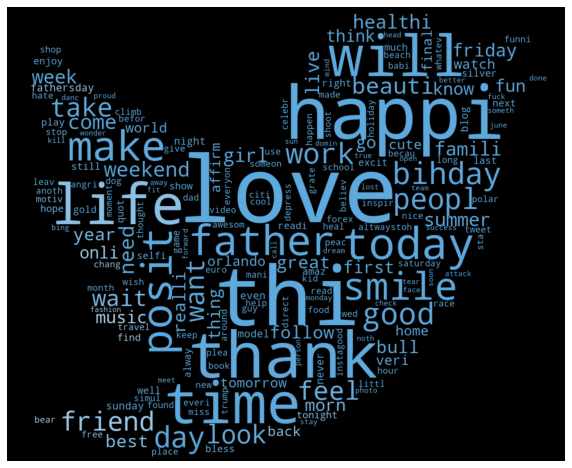

In [49]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
word_cloud = WordCloud(collocations = False, background_color = 'black',mask=Mask).generate(all_words_positive)
plt.figure(figsize=(10,20))
plt.imshow(word_cloud.recolor(color_func=image_colors),interpolation="hamming")
plt.axis("off")
plt.show()

Generating WordCloud for tweets with label ‘1‘.

In [50]:
all_negative_words = ' '.join(text for text in combine_data['Tidy_Tweets'][combine_data['label']==1])

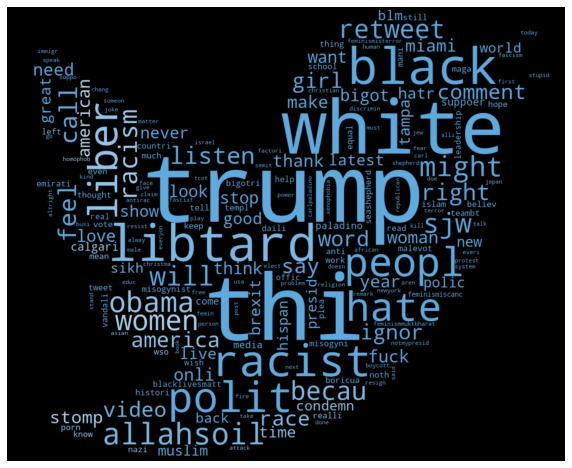

In [57]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
word_cloud = WordCloud(collocations = False, background_color = 'black',mask=Mask).generate(all_negative_words)
plt.figure(figsize=(10,20))
plt.imshow(word_cloud.recolor(color_func=image_colors),interpolation="hamming")
plt.axis("off")
plt.show()

Extracting hashtags from tweets

In [67]:
def Hashtags_Extract(x):
    hashtags=[]
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags

In [68]:
positive_hashtag = Hashtags_Extract(combine_data['Tidy_Tweets'][combine_data['label']==0])
list_positive_hashtag = sum(positive_hashtag,[])
list_positive_hashtag

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconf',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontphot

In [77]:
negative_hashtag = Hashtags_Extract(combine_data['Tidy_Tweets'][combine_data['label']==1])
list_negative_hashtag = sum(negative_hashtag,[])
list_negative_hashtag

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejud',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prai',
 'cleveland',
 'rnc',
 'white',
 'tamirr',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc',
 '

**For positive tweets in the dataset**

Counting the frequency of the words having Positive Sentiment

In [78]:
positive_word_freq = nltk.FreqDist(list_positive_hashtag)
positive_word_freq

FreqDist({'love': 1655, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 535, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [79]:
df_positive = pd.DataFrame({'Hashtags':list(positive_word_freq.keys()),'Count':list(positive_word_freq.values())})
df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


Barplot : Plotting the barplot for the 20 most frequent words used for hashtags

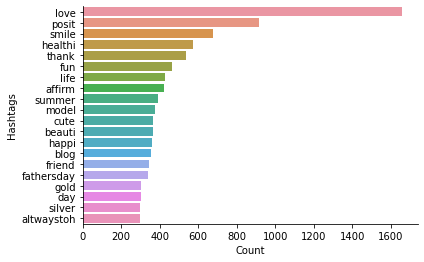

In [80]:
df_positive_plot = df_positive.nlargest(20,columns='Count')
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

**For Negative Tweets in the dataset**

Counting the frequency of the words having Negative Sentiment

In [81]:
negative_word_freq = nltk.FreqDist(list_negative_hashtag)
negative_word_freq

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 82, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [82]:
df_negative = pd.DataFrame({'Hashtags':list(negative_word_freq.keys()),'Count':list(negative_word_freq.values())})
df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


Barplot : Plotting the barplot for the 20 most frequent words used for hashtags

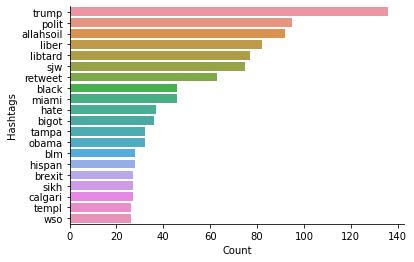

In [83]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()